**Importing libraries**

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,accuracy_score




**Loading dataset**

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
import pandas as pd
file_path='/content/drive/My Drive/housing.csv'
df=pd.read_csv(file_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='price', ylabel='Density'>

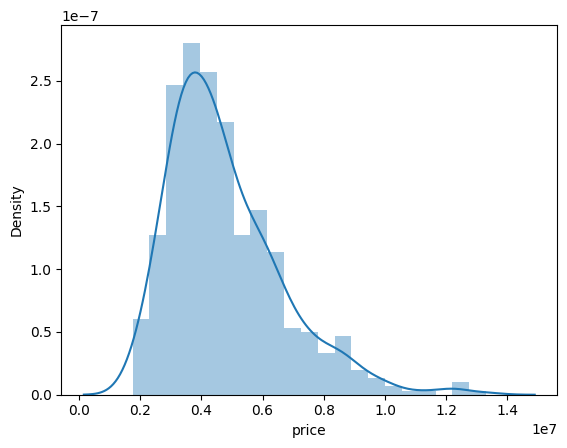

In [169]:
sns.distplot(df['price'])

**Shape of the dataframe**

In [168]:
df.shape

(545, 13)

**Information about data types of values**

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Heatmap to show correlation**

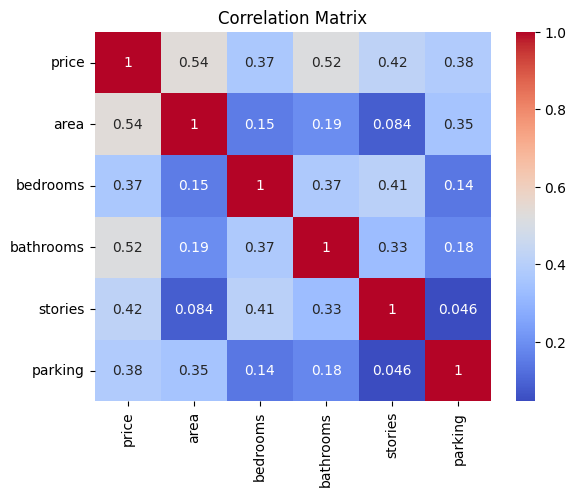

In [173]:
correlation_matrix = df_quantitative.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**One-Hot Encoding for Categorical Columns**

In [174]:
from sklearn.preprocessing import OneHotEncoder
s=(df.dtypes=='object')
categorical_cols=list(s[s].index)
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out(categorical_cols)
df_final = df.drop(categorical_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


**Defining X,y**

In [177]:
X=df_final.drop(columns=['price'],axis=1)
y=df_final['price']


**Splitting in training and testing data**

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=101,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((272, 20), (273, 20), (272,), (273,))

**Defining the linear regression model and evaluating its performance**

In [179]:
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)

print(f"For Linear Regression:\nMSE:{mse}\nMAE:{mae}\nR2_Score:{r2}")

For Linear Regression:
MSE:1218113739386.3667
MAE:821568.5633470259
R2_Score:0.6220428707542185


**Scatter Plot to depict prediction vs actual values**

Text(0.5, 1.0, 'Scatter Plot with Best-fit Line')

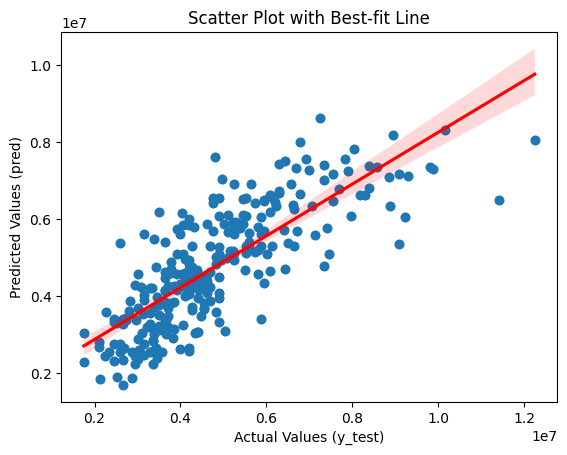

In [188]:
plt.scatter(y_test,pred)
sns.regplot(x=y_test, y=pred, line_kws={'color': 'red'})
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (pred)")
plt.title("Scatter Plot with Best-fit Line")